In [151]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



In [152]:
train_data=pd.read_csv('train.csv')

test_data=pd.read_csv('test.csv')


In [153]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20        10       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
750          751         0       2   
751          752         1       1   
752          753         0       3   
753          754         0       2   
754          755         1       2   
755          756         1       2   
756          757         0       1   
757          758         0       3   
758          759         1       3   
759          760         0       3   
760          761         1       1   
761          762         0       1   
762          763         0       3   
763          764         1       2   
764          765         1       3   
765          766         0       3   
766          767         0       3   
767          768         0       3   
768          769         1       1   
769          770         1       2   
770          771         0       3   
771          772         0       3   
772          773         0       2   
773          774         0       3   
774          775         0       3   
775          776         0       2   
776          777         1       1   
777          778         0       3   
778          779         1       1   
779          780         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [154]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   780.000000  780.000000  780.000000  621.000000  780.000000   
mean    390.500000    0.538462    2.317949   29.578100    0.538462   
std     225.310896    2.950130    0.836544   14.575429    1.139695   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     195.750000    0.000000    2.000000   21.000000    0.000000   
50%     390.500000    0.000000    3.000000   28.000000    0.000000   
75%     585.250000    1.000000    3.000000   38.000000    1.000000   
max     780.000000   78.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  780.000000  780.000000  
mean     0.388462   30.632061  
std      0.802192   43.314213  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.458300  
75%      0.000000   30.500000  
max      5.000000  512.329200

In [155]:
train_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            159
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          606
Embarked         2
dtype: int64

In [156]:
test_data.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [157]:
train_data['Survived'].value_counts()

0     477
1     297
78      1
21      1
10      1
8       1
4       1
2       1
Name: Survived, dtype: int64

In [158]:
train_data=train_data[train_data.Survived!=78]
train_data=train_data[train_data.Survived!=21]
train_data=train_data[train_data.Survived!=10]
train_data=train_data[train_data.Survived!=8]
train_data=train_data[train_data.Survived!=4]
train_data=train_data[train_data.Survived!=2]


In [159]:
train_data['Survived'].value_counts()

0    477
1    297
Name: Survived, dtype: int64

In [160]:
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].mean())

In [161]:
test_data.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [162]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.616216
1       2  0.487013
2       3  0.248276

In [163]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)

In [164]:
combine = [train_data, test_data]

In [165]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])


Sex       female  male
Title                 
Col            0     1
Don            0     1
Dr             1     5
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    37
Miss         164     0
Mlle           1     0
Mme            1     0
Mr             0   440
Mrs          111     0
Ms             1     0
Rev            0     6
Sir            0     1

In [166]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.540541
1    Miss  0.692771
2      Mr  0.150000
3     Mrs  0.794643
4    Rare  0.368421

In [167]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked  Title  
0      0   7.2500        S      1  
1      0  71.2833        C      3  
2      0   7.9250        S      2  
3      0  53.1000        S      3  
4      0   8.0500        S      1

In [168]:
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]

In [169]:
train_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    male  22.0      1      0   7.2500        S      1
1         1       1  female  38.0      1      0  71.2833        C      3
2         1       3  female  26.0      0      0   7.9250        S      2
3         1       1  female  35.0      1      0  53.1000        S      3
4         0       3    male  35.0      0      0   8.0500        S      1

In [170]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1

D:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


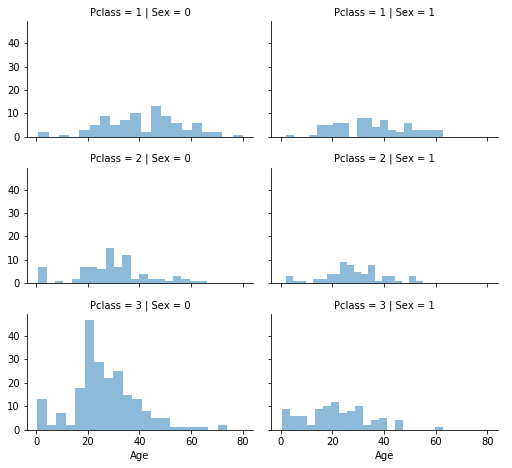

In [171]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

It is seen that test data has null values for age. Therefore, imputing age values by considering relations between Age, Sex and Pclass.

In [172]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [173]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_data.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0   22      1      0   7.2500        S      1
1         1       1    1   38      1      0  71.2833        C      3
2         1       3    1   26      0      0   7.9250        S      2
3         1       1    1   35      1      0  53.1000        S      3
4         0       3    0   35      0      0   8.0500        S      1

In [174]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0  (-0.08, 16.0]  0.545455
1   (16.0, 32.0]  0.337182
2   (32.0, 48.0]  0.402174
3   (48.0, 64.0]  0.466667
4   (64.0, 80.0]  0.111111

In [175]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_data.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title  \
0         0       3    0    1      1      0   7.2500        S      1   
1         1       1    1    2      1      0  71.2833        C      3   
2         1       3    1    1      0      0   7.9250        S      2   
3         1       1    1    2      1      0  53.1000        S      3   
4         0       3    0    2      0      0   8.0500        S      1   

        AgeBand  
0  (16.0, 32.0]  
1  (32.0, 48.0]  
2  (16.0, 32.0]  
3  (32.0, 48.0]  
4  (32.0, 48.0]

In [176]:
train_data = train_data.drop(['AgeBand'], axis=1)
combine = [train_data, test_data]
train_data.head()

Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0    1      1      0   7.2500        S      1
1         1       1    1    2      1      0  71.2833        C      3
2         1       3    1    1      0      0   7.9250        S      2
3         1       1    1    2      1      0  53.1000        S      3
4         0       3    0    2      0      0   8.0500        S      1

In [177]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.720000
2           3  0.586957
1           2  0.547445
6           7  0.333333
0           1  0.306034
5           6  0.142857
4           5  0.083333
7           8  0.000000
8          11  0.000000

In [178]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

IsAlone  Survived
0        0  0.500000
1        1  0.306034

In [179]:
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_data, test_data]

train_data.head()

Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0         0       3    0    1   7.2500        S      1        0
1         1       1    1    2  71.2833        C      3        0
2         1       3    1    1   7.9250        S      2        1
3         1       1    1    2  53.1000        S      3        0
4         0       3    0    2   8.0500        S      1        1

In [180]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        0  1.000000
1        C  0.547297
2        Q  0.405797
3        S  0.335135

In [190]:
del train_data['Embarked']

In [192]:
del test_data['Embarked']

In [216]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

PassengerId  Pclass  Sex  Age  Fare  Title  IsAlone
0          892       3    0    2     0      1        1
1          893       3    1    2     0      3        0
2          894       2    0    3     0      1        1
3          895       3    0    1     0      1        1
4          896       3    1    1     0      3        0

In [217]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

ValueError: Bin edges must be unique: array([0., 0., 0., 0., 0.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [218]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]
    
train_data.head(10)

KeyError: "['FareBand'] not found in axis"

In [219]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

## Using Logistic Regression

In [220]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

D:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.17

In [221]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1      Sex     2.185838
4    Title     0.447612
5  IsAlone     0.212456
3     Fare     0.000000
2      Age    -0.020100
0   Pclass    -0.901760

## Using SVM

In [222]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

D:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


81.52

## Using KNN

In [223]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.49

## Using Random Forest

In [224]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


82.95

Since random decision forests gave maximum score. It is used for prediction below. 

In [225]:
Y_pred = random_forest.predict(X_test)

In [226]:
prediction = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })

In [145]:
prediction

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         0
404         1296         0
405         1297         0
406         1298         0
407         1299         0
408         1300         1
409         1301         0
410         1302         1
411         1303         1
412         1304         0
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [240]:

prediction.to_csv('submission1.csv',index=False)